# <a id='toc1_'></a>[<center>Phishing Emails Detection</center>](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [<center>Phishing Emails Detection</center>](#toc1_)    
  - [Libraries](#toc1_1_)    
  - [Loading Data](#toc1_2_)    
  - [Basic EDA](#toc1_3_)    
    - [Label Distribution](#toc1_3_1_)    
    - [Which keyworks or group of words are more frequent in phishing emails?](#toc1_3_2_)    
    - [What about safe emails?](#toc1_3_3_)    
  - [Preparing Data](#toc1_4_)    
  - [Building the Model](#toc1_5_)    
    - [Logistic Regression Model](#toc1_5_1_)    
      - [Mathematical Foundation](#toc1_5_1_1_)    
      - [Probability Estimation](#toc1_5_1_2_)    
      - [Decision Rule](#toc1_5_1_3_)    
      - [Model Training](#toc1_5_1_4_)    
  - [Model Evaluation](#toc1_6_)    
  - [Deployment](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

![](https://marvel-b1-cdn.bc0a.com/f00000000032040/cdn.prod.website-files.com/672e4d78ddc6417dc8ab2e1f/675a28b32b088f04d89ce051_32040_94c482e61bc04c5bb6a918a7cde3d962_1542746731.png)

Phishing emails are fraudulent messages designed to trick recipients into revealing sensitive information like passwords, credit card details, or personal data. These emails often mimic legitimate organizations or individuals to gain trust and deceive victims into taking actions that compromise their security. 

Here's a breakdown of what makes phishing emails dangerous and how to identify them:
How Phishing Emails Work:

    Impersonation:
    Phishing emails try to impersonate trusted entities like banks, social media platforms, or even colleagues. 

Deceptive Tactics:
They often use urgent or threatening language, create a sense of urgency, or offer enticing deals to pressure recipients into acting quickly without thinking. 
Malicious Links/Attachments:
Phishing emails may contain malicious links that lead to fake websites designed to steal information, or attachments that install malware on the victim's device. 
Spear Phishing:
A more targeted form of phishing, spear-phishing, uses information gathered about specific individuals to create highly personalized and convincing emails. 

How to Spot a Phishing Email:

    Check the Sender: Verify the sender's email address and ensure it matches the organization's official domain. 

Look for Errors: Be wary of emails with grammatical errors, spelling mistakes, or awkward phrasing, according to Benedictine University. 
Beware of Urgent Language: Phishing emails often create a sense of urgency, threatening account suspension or demanding immediate action. 
Hover Over Links: Before clicking on any link, hover your mouse over it to see the actual URL. If it doesn't match the link's description or leads to a suspicious website, it's likely a phishing attempt. 
Don't Trust Unexpected Attachments: Avoid opening attachments from unknown or untrusted senders. 
Be Skeptical of Requests for Personal Information: Legitimate organizations rarely ask for sensitive information via email. 

What to Do If You Suspect a Phishing Email:

    Don't Click Links or Open Attachments:
    Avoid clicking on any links or opening attachments in the suspicious email. 

Report the Email:
Report the phishing attempt to your email provider, your organization's IT security team, or relevant authorities. 
Delete the Email:
Once you've reported it, delete the email from your inbox to prevent accidental clicks. 

By staying vigilant and following these tips, you can protect yourself from falling victim to phishing attacks. 


In this project, we will create a phishing email detector using the following [dataset](https://research.utwente.nl/en/datasets/phishing-validation-emails-dataset)

**Objectives**

- Load, explore, and prepare email dataset
- Build a ML model
- Evaluate the model
- Deploy

## <a id='toc1_1_'></a>[Libraries](#toc0_)

In [ ]:
import os 
import joblib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

## <a id='toc1_2_'></a>[Loading Data](#toc0_)

In [ ]:
df = pd.read_csv("Phishing_validation_emails.csv")

## <a id='toc1_3_'></a>[Basic EDA](#toc0_)

In [3]:
df.head()

,Email Text,Email Type
0,"Dear Jordan, your subscription has been succes...",Safe Email
1,"Dear Casey, thank you for your purchase. Your ...",Safe Email
2,Congratulations! You've won a $3000 gift card....,Phishing Email
3,You have a new secure message from your bank. ...,Phishing Email
4,Your package delivery is pending. Please provi...,Phishing Email


In [4]:
df.tail()

,Email Text,Email Type
1995,Your payment has been declined. Update your bi...,Phishing Email
1996,"Hi Taylor, it was great meeting you at the con...",Safe Email
1997,Your subscription is about to expire. Renew no...,Phishing Email
1998,"Hi John, just a reminder about the project dea...",Safe Email
1999,Your payment has been declined. Update your bi...,Phishing Email


In [ ]:
df.shape

(2000, 2)

### <a id='toc1_3_1_'></a>[Label Distribution](#toc0_)

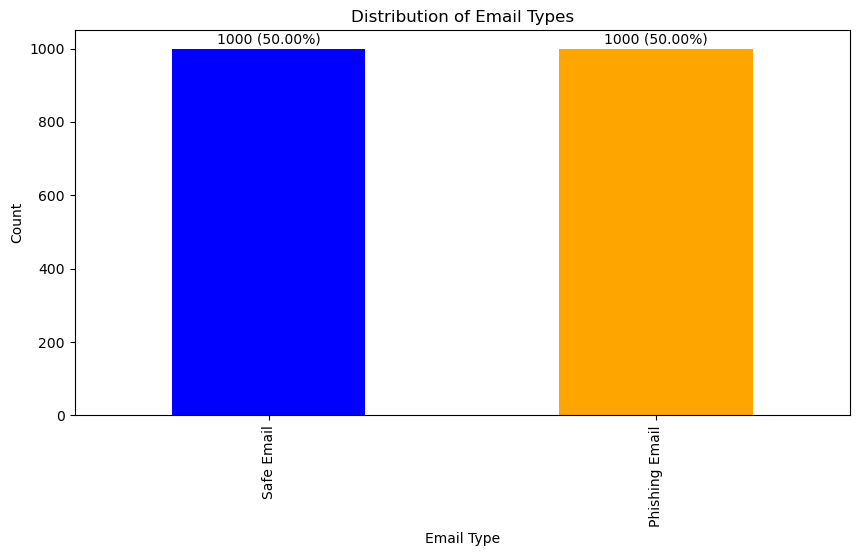

In [6]:
df["Email Type"].value_counts().plot(kind='bar', figsize=(10, 5), color=['blue', 'orange'])
plt.title('Distribution of Email Types')
plt.xlabel('Email Type')
plt.ylabel('Count')
# add count and percentage on top of bars
for index, value in enumerate(df["Email Type"].value_counts()):
    plt.text(index, value + 5, f'{value} ({value/df.shape[0]*100:.2f}%)', ha='center', va='bottom')
plt.show()

We have 2000 emails in our dataset, with half being phishing emails.

### <a id='toc1_3_2_'></a>[Which keyworks or group of words are more frequent in phishing emails?](#toc0_)

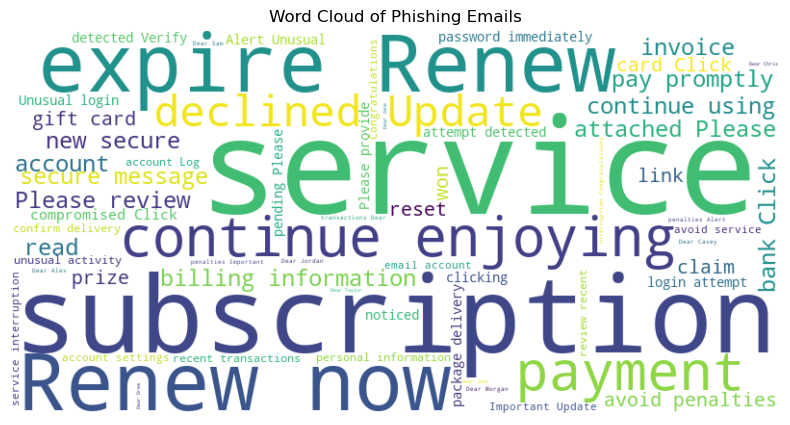

In [ ]:
# wordmap of phishing emails
phishing_emails = df[df["Email Type"] == "Phishing Email"]["Email Text"]

phishing_emails_combined = " ".join(phishing_emails)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_emails_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Phishing Emails')
plt.show()


### <a id='toc1_3_3_'></a>[What about safe emails?](#toc0_)

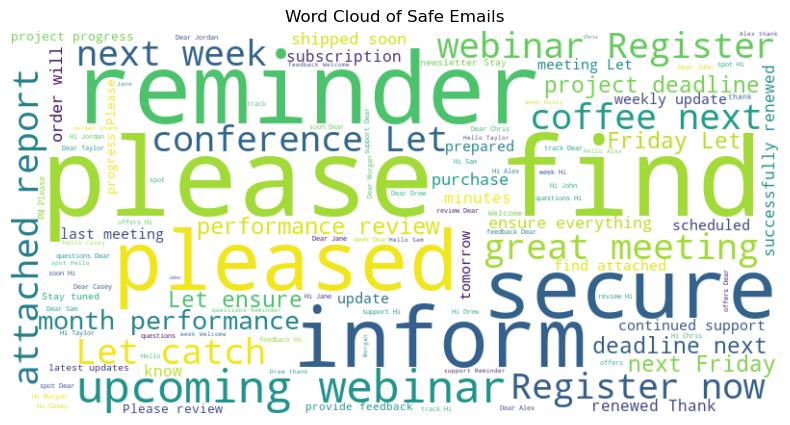

In [8]:
# wordcloud of safe emails
safe_emails = df[df["Email Type"] == "Safe Email"]["Email Text"]
safe_emails_combined = " ".join(safe_emails)
wordcloud_safe = WordCloud(width=800, height=400, background_color='white').generate(safe_emails_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_safe, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Safe Emails')
plt.show()

From the above wordmaps, we can see that within phishing emails, the most recurrent words are **renew**, **service**, **subscription**. The sender seems to attempt by all means to sell something to the recepient; whereas in the safe emails, the most frequent keywords **please find**, **reminder**, and **secure** seems to give more freedom of choice to the recipient. 

## <a id='toc1_4_'></a>[Preparing Data](#toc0_)

This code block performs the essential data preprocessing steps for the phishing email detection machine learning model.

First, it separates the features (X) and target variable (y) by extracting the email text content and corresponding email types from the dataset.

Since machine learning algorithms require numerical inputs, a LabelEncoder is applied to convert the categorical email types ("Phishing Email" and "Safe Email") into numerical labels (0 and 1). The dataset is then split into training and testing sets using an 80-20 split, with stratification ensuring that both sets maintain the same proportion of phishing and safe emails. 

Finally, the text data is converted into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, which transforms the email text into a matrix of TF-IDF features while removing common English stop words and limiting the vocabulary to the 5000 most important features. This preprocessing pipeline prepares the data in the proper format for training a machine learning classifier to distinguish between phishing and legitimate emails.

In [ ]:
X, y = df["Email Text"], df["Email Type"]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## <a id='toc1_5_'></a>[Building the Model](#toc0_)

### <a id='toc1_5_1_'></a>[Logistic Regression Model](#toc0_)

For this phishing email detection task, we employ **Logistic Regression**, a linear classification algorithm that's particularly well-suited for binary classification problems like distinguishing between phishing and legitimate emails.

#### <a id='toc1_5_1_1_'></a>[Mathematical Foundation](#toc0_)

Logistic regression uses the **sigmoid function** (also called the logistic function) to map any real-valued input to a value between 0 and 1, making it perfect for probability estimation:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where $z$ is the linear combination of features:

$$z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n = \beta_0 + \sum_{i=1}^{n}\beta_ix_i$$

In our case, the features $x_i$ represent the TF-IDF values of different words in the email text, and $\beta_i$ are the learned coefficients that determine the importance of each word for classification.

#### <a id='toc1_5_1_2_'></a>[Probability Estimation](#toc0_)

The model outputs the probability that an email is phishing:

$$P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \sum_{i=1}^{n}\beta_ix_i)}}$$

Where:
- $y=1$ represents a phishing email
- $y=0$ represents a safe email
- $x$ is the feature vector (TF-IDF representation of the email)

#### <a id='toc1_5_1_3_'></a>[Decision Rule](#toc0_)

The final classification decision is made using:

$$\hat{y} = \begin{cases} 
1 & \text{if } P(y=1|x) \geq 0.5 \\
0 & \text{if } P(y=1|x) < 0.5 
\end{cases}$$

#### <a id='toc1_5_1_4_'></a>[Model Training](#toc0_)

The coefficients $\beta$ are learned by maximizing the **log-likelihood** function:

$$\ell(\beta) = \sum_{i=1}^{m} [y_i \log(p_i) + (1-y_i) \log(1-p_i)]$$

Where $m$ is the number of training examples, $y_i$ is the true label, and $p_i$ is the predicted probability for the $i$-th example.

This optimization problem is solved using iterative algorithms like **Limited-memory BFGS** (L-BFGS), which is why we set `max_iter=1000` to ensure convergence.

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

## <a id='toc1_6_'></a>[Model Evaluation](#toc0_)

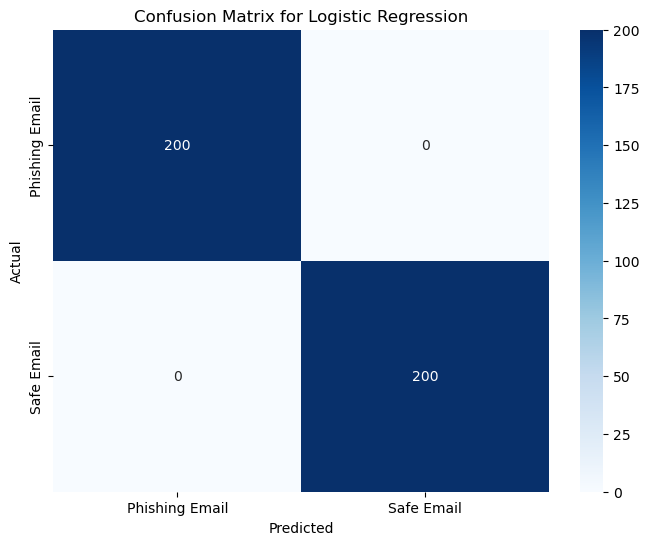

In [11]:
lr_conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
classification_report_lr = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report for Logistic Regression:\n", classification_report_lr)


Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

Phishing Email       1.00      1.00      1.00       200
    Safe Email       1.00      1.00      1.00       200

      accuracy                           1.00       400
     macro avg       1.00      1.00      1.00       400
  weighted avg       1.00      1.00      1.00       400



In this task, the trained model seems to be totally accurate. Either the task is too easy, or the email in test set are very similar to those in training set.

## <a id='toc1_7_'></a>[Deployment](#toc0_)

In [13]:
# save model and vectorizer
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [14]:
# deployment function
def predict_email_type(email_text):
    # Load the model and vectorizer
    model = joblib.load('logistic_regression_model.pkl')
    vectorizer = joblib.load('tfidf_vectorizer.pkl')
    
    # Transform the input email text
    email_tfidf = vectorizer.transform([email_text])
    
    # Predict the email type
    prediction = model.predict(email_tfidf)
    
    # Decode the prediction
    predicted_label = le.inverse_transform(prediction)[0]
    
    return predicted_label

In [15]:
# Example usage of the deployment function
## Ask the user to input an email text
email_text = input("Please enter the email text you want to classify: ")
predicted_type = predict_email_type(email_text)
print(f"The predicted type of the email is: {predicted_type}")

The predicted type of the email is: Safe Email


**Author(s)**

Ameck Guy-Max Désiré DOSSEH